In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [78]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [79]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [80]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [81]:
df.shape

(200, 5)

In [82]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [83]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [84]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

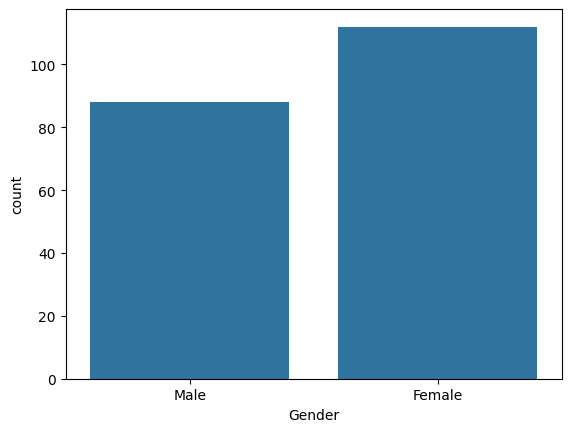

In [85]:
sns.countplot(x='Gender',data=df)

In [86]:
df.drop(['CustomerID','Gender'],axis=1,inplace=True)
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [87]:
# here we are going to form clusters using these 3 columns


In [88]:
# first step is to find the value of k (number of clusters needed)
# we use elbow point
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    data=KMeans(n_clusters=i,init='k-means++',random_state=42) #init='k-means++'   == it is used to initialise k-means
    data.fit(df) # here only input can be fit
    wcss.append(data.inertia_) # .inertia_  == it is used to find varience
    


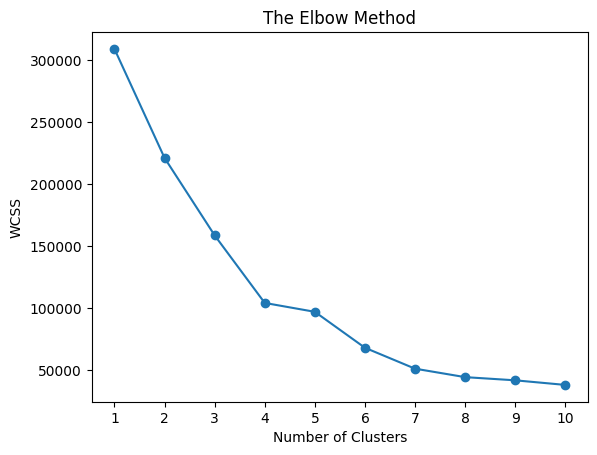

In [89]:
#grph plot to find elbow point
plt.plot(range(1, 11), wcss, marker='o')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [90]:
# we need 7 clusters in this dataframe
# now we are going to predict y value with this
data1=KMeans(n_clusters=7,init='k-means++',random_state=42)
data1.fit(df)
y_pred=data1.predict(df)
y_pred

#in the output, the 1st category person belong to group 5,the 2nd category person belong to group 2,
# the 3rd category person belong to group 5 .....


array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 5, 2,
       5, 2, 0, 6, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 6,
       0, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 6, 6, 0, 0, 6, 0, 0, 6, 0, 0, 6,
       6, 0, 0, 6, 0, 6, 6, 6, 0, 6, 0, 6, 6, 0, 0, 6, 0, 6, 0, 0, 0, 0,
       0, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 4, 6, 4, 6, 4, 3, 4, 3, 4,
       6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [91]:
#now we should attach input and output
df['clusters']=y_pred
df

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,5
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


In [92]:
df['clusters'].value_counts()

clusters
0    44
6    38
3    34
4    32
2    23
5    22
1     7
Name: count, dtype: int64

In [93]:
# now in the data frame input and output is their, so we can perform classification algorithm here


In [94]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,5
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5


In [95]:
df.tail()

,Age,Annual Income (k$),Spending Score (1-100),clusters
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3
199,30,137,83,1


In [96]:
df.shape

(200, 4)

In [97]:
df.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
clusters                  0
dtype: int64

In [98]:
df.dtypes

Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
clusters                  int32
dtype: object

In [99]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [101]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)

In [102]:
#multiple model creation 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn=KNeighborsClassifier(n_neighbors=7)
nai=GaussianNB()
sup=SVC()

In [103]:
lst=[knn,nai,sup]
for i in lst:
    print("Model name is ---> ",i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print("Performance Evaluation of ",i,"****************")
    print('confusion_matrix === ')
    print(confusion_matrix(y_test,y_pred))
    print('accuracy_score === ',accuracy_score(y_test,y_pred))
    print('classification_report === ',classification_report(y_test,y_pred))
    print('-'*100)

Model name is --->  KNeighborsClassifier(n_neighbors=7)
Performance Evaluation of  KNeighborsClassifier(n_neighbors=7) ****************
confusion_matrix === 
[[14  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0  5  0]
 [ 1  0  0  0  0  0 13]]
accuracy_score ===  0.9833333333333333
classification_report ===                precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         5
           6       1.00      0.93      0.96        14

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60

----------

In [104]:
df

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,5
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


In [113]:
print(knn.predict(scalar.transform([[19,15,39]])))


[5]
